1.1 - Movielens full - EDA
Nu ska du ladda ned datasetet ml-latest.zip under sektionen "recommended for education and
development". Läs in dataseten "movies.csv" och "ratings.csv" besvara på följande frågorna nedan.
a) Gör en EDA för att förstå datasetet. Inkludera olika slags plots. Begränsa dig inte till frågorna nedan,
utan försök undersöka fler aspekter av datan

In [2]:
import pandas as pd

df_movies = pd.read_csv("../Data/ml-latest/movies.csv")
df_ratings = pd.read_csv("../Data/ml-latest/ratings.csv")



In [3]:
df_movies.set_index("movieId", inplace=True)
df_movies

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
193876,The Great Glinka (1946),(no genres listed)
193878,Les tribulations d'une caissière (2011),Comedy
193880,Her Name Was Mumu (2016),Drama


In [4]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


array([[<Axes: title={'center': 'userId'}>,
        <Axes: title={'center': 'movieId'}>],
       [<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'timestamp'}>]], dtype=object)

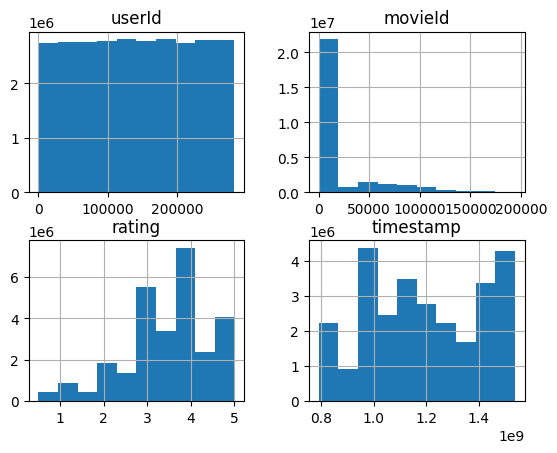

In [5]:
df_ratings.hist()

In [6]:
df_ratings.dropna(inplace=True)


b) Vilka är de 10 filmerna med flest ratings?

In [7]:
ten_most = df_ratings["movieId"].value_counts().head(10)

print("--- Ten most ranked movies ---")
print()

for i, movie in enumerate(ten_most.index):
    print(f"{ten_most.iloc[i]} ratings - ", end="")
    print(df_movies.loc[movie]["title"])

--- Ten most ranked movies ---

97999 ratings - Shawshank Redemption, The (1994)
97040 ratings - Forrest Gump (1994)
92406 ratings - Pulp Fiction (1994)
87899 ratings - Silence of the Lambs, The (1991)
84545 ratings - Matrix, The (1999)
81815 ratings - Star Wars: Episode IV - A New Hope (1977)
76451 ratings - Jurassic Park (1993)
71516 ratings - Schindler's List (1993)
68803 ratings - Braveheart (1995)
68469 ratings - Toy Story (1995)


c) Beräkna den genomsnittliga ratingen för dessa 10 filmerna med flest ratings.

In [8]:
print("--- Ratings of ten most ranked movies ---")
print()
for movie in ten_most.index:
    print(round(df_ratings[df_ratings["movieId"] == movie]["rating"].mean(), 2), end = " - ")
    print(df_movies.loc[movie]["title"])


--- Ratings of ten most ranked movies ---

4.42 - Shawshank Redemption, The (1994)
4.06 - Forrest Gump (1994)
4.17 - Pulp Fiction (1994)
4.15 - Silence of the Lambs, The (1991)
4.15 - Matrix, The (1999)
4.12 - Star Wars: Episode IV - A New Hope (1977)
3.67 - Jurassic Park (1993)
4.26 - Schindler's List (1993)
4.01 - Braveheart (1995)
3.89 - Toy Story (1995)


d) Gör en plot över årtal och antalet filmer representerade i datasetet.

In [9]:
import plotly.express as px


movies_year = df_movies
movies_year["year"] = df_movies["title"].str.extract(
    r"\((\d{4})\)"
)
# extracting digits from within parenthesis.
# Idea taken from Philip: https://github.com/Canesp/Machine-learning-Philip-de-Canesie/blob/main/Lab/recommend.ipynb

movies_per_year = movies_year.groupby("year").size().reset_index(name="count")

fig = px.bar(movies_per_year, x="year", y="count", title="Number of Movies per Year")
fig.show()


e) Gör en plot över antalet ratings mot movieId.

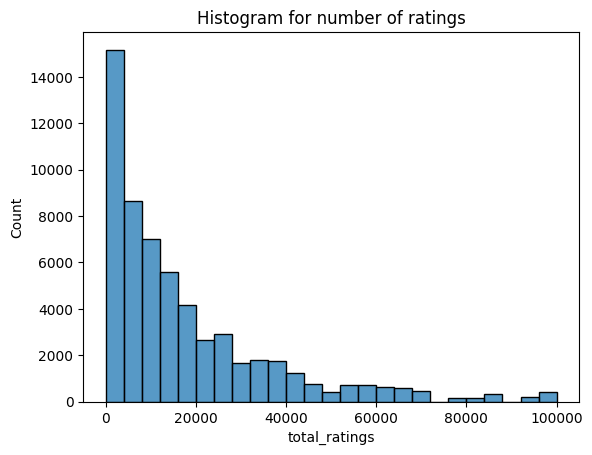

In [10]:
import seaborn as sns

df_movies["total_ratings"] = df_ratings.groupby("movieId")["rating"].transform(len)
sns.histplot(df_movies, x="total_ratings", binwidth=4000).set(title="Histogram for number of ratings");



In [11]:
import numpy as np

#ratings["mean_rating"] = ratings["rating"].mean()
df_movies["mean_rating"] = df_ratings.groupby('movieId')['rating'].transform(np.mean)
df_movies.sort_values(by="total_ratings", ascending=False)

,title,genres,year,total_ratings,mean_rating
movieId,,,,,
138964,Pale Blood (1991),Action|Horror|Thriller,1991,97999,4.424188
91511,"Goddess, The (Shen nu) (1934)",Drama,1934,97999,4.424188
176681,Batman & Harley Quinn (2017),Action|Animation,2017,97999,4.424188
3920,"Faraway, So Close (In weiter Ferne, so nah!) (...",Drama|Fantasy|Mystery|Romance,1993,97999,4.424188
173989,Moving Day (1936),Animation,1936,97999,4.424188
...,...,...,...,...,...
155425,A Quiet Place in the Country (1968),Drama|Horror,1968,1,4.000000
167290,Happy Birthday (2016),Horror|Thriller,2016,1,2.000000
135270,"Up, Up, and Away (2000)",Action|Children,2000,1,5.000000


In [14]:
from scipy import sparse

# movies = pd.Categorical(df_ratings['movieId'])
# users = pd.Categorical(df_ratings['userId'])
# mat_movies_users = sparse.csr_matrix((df_ratings['rating'], (movies.codes, users.codes)))

In [20]:
df_ratings = df_ratings[:5000000]

In [21]:


movies_users = df_ratings.pivot(index="movieId", columns="userId", values="rating").fillna(0)
mat_movies_users = sparse.csr_matrix(movies_users.values)

In [22]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric="cosine", algorithm="brute", n_neighbors=10)

In [23]:
model_knn.fit(mat_movies_users)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=10)

In [24]:
from fuzzywuzzy import process

def recommender(movie_name, data, model, n_recommendations):
    model.fit(data)
    idx=process.extractOne(movie_name, df_movies["title"])[2]
    print(f"Movie Selected: {df_movies['title'][idx]} Index: {idx}")
    print("Searching for recommendations...")
    distances, indices = model.kneighbors(data[idx], n_neighbors=n_recommendations)
    for i in indices:
        print(df_movies["title"][i].where(i!=idx))

recommender("shawshank redemption", mat_movies_users, model_knn, 20)

Movie Selected: Shawshank Redemption, The (1994) Index: 318
Searching for recommendations...


KeyError: '[10897, 20857, 18154, 9106, 12297, 16943, 21224, 17244, 18177, 13392] not in index'